# **Minicurso SBSEG 2024**

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Caminho para o arquivo no Google Drive
file_path_1 = '/content/drive/My Drive/txs_features.csv'
file_path_2 = '/content/drive/My Drive/txs_classes.csv'

In [ ]:
# Leitura do dataframe contendo as features
#file_path = 'files/txs_features.csv'
df_1 = pd.read_csv(file_path_1)
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 184 entries, txId to out_BTC_total
dtypes: float64(182), int64(2)
memory usage: 286.1 MB
None


In [ ]:
# Leitura do dataframe contendo as classes
#file_path = 'files/txs_classes.csv'
df_2 = pd.read_csv(file_path_2)
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId    203769 non-null  int64
 1   class   203769 non-null  int64
dtypes: int64(2)
memory usage: 3.1 MB
None


In [ ]:
# Merge dos dataframes usando a coluna 'txId'
df_3 = pd.merge(df_1, df_2, on='txId', how='left')
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 185 entries, txId to class
dtypes: float64(182), int64(3)
memory usage: 287.6 MB
None


In [ ]:
# Visualização das colunas do dataframe
print(df_3.columns.tolist())

['txId', 'Time step', 'Local_feature_1', 'Local_feature_2', 'Local_feature_3', 'Local_feature_4', 'Local_feature_5', 'Local_feature_6', 'Local_feature_7', 'Local_feature_8', 'Local_feature_9', 'Local_feature_10', 'Local_feature_11', 'Local_feature_12', 'Local_feature_13', 'Local_feature_14', 'Local_feature_15', 'Local_feature_16', 'Local_feature_17', 'Local_feature_18', 'Local_feature_19', 'Local_feature_20', 'Local_feature_21', 'Local_feature_22', 'Local_feature_23', 'Local_feature_24', 'Local_feature_25', 'Local_feature_26', 'Local_feature_27', 'Local_feature_28', 'Local_feature_29', 'Local_feature_30', 'Local_feature_31', 'Local_feature_32', 'Local_feature_33', 'Local_feature_34', 'Local_feature_35', 'Local_feature_36', 'Local_feature_37', 'Local_feature_38', 'Local_feature_39', 'Local_feature_40', 'Local_feature_41', 'Local_feature_42', 'Local_feature_43', 'Local_feature_44', 'Local_feature_45', 'Local_feature_46', 'Local_feature_47', 'Local_feature_48', 'Local_feature_49', 'Local_

In [ ]:
# Exclusão das colunas 'Local_featura' e 'Aggregate_feature'
columns_list = df_3.columns.tolist()
pattern = re.compile(r'(Local_feature|Aggregate_feature)_\d+')
columns_to_remove = [col for col in columns_list if pattern.match(col)]
df_3 = df_3.drop(columns = columns_to_remove)
print(df_3.columns.tolist())

['txId', 'Time step', 'in_txs_degree', 'out_txs_degree', 'total_BTC', 'fees', 'size', 'num_input_addresses', 'num_output_addresses', 'in_BTC_min', 'in_BTC_max', 'in_BTC_mean', 'in_BTC_median', 'in_BTC_total', 'out_BTC_min', 'out_BTC_max', 'out_BTC_mean', 'out_BTC_median', 'out_BTC_total', 'class']


In [ ]:
df_3 = df_3.drop('txId', axis=1)
print(df_3.columns.tolist())

['Time step', 'in_txs_degree', 'out_txs_degree', 'total_BTC', 'fees', 'size', 'num_input_addresses', 'num_output_addresses', 'in_BTC_min', 'in_BTC_max', 'in_BTC_mean', 'in_BTC_median', 'in_BTC_total', 'out_BTC_min', 'out_BTC_max', 'out_BTC_mean', 'out_BTC_median', 'out_BTC_total', 'class']


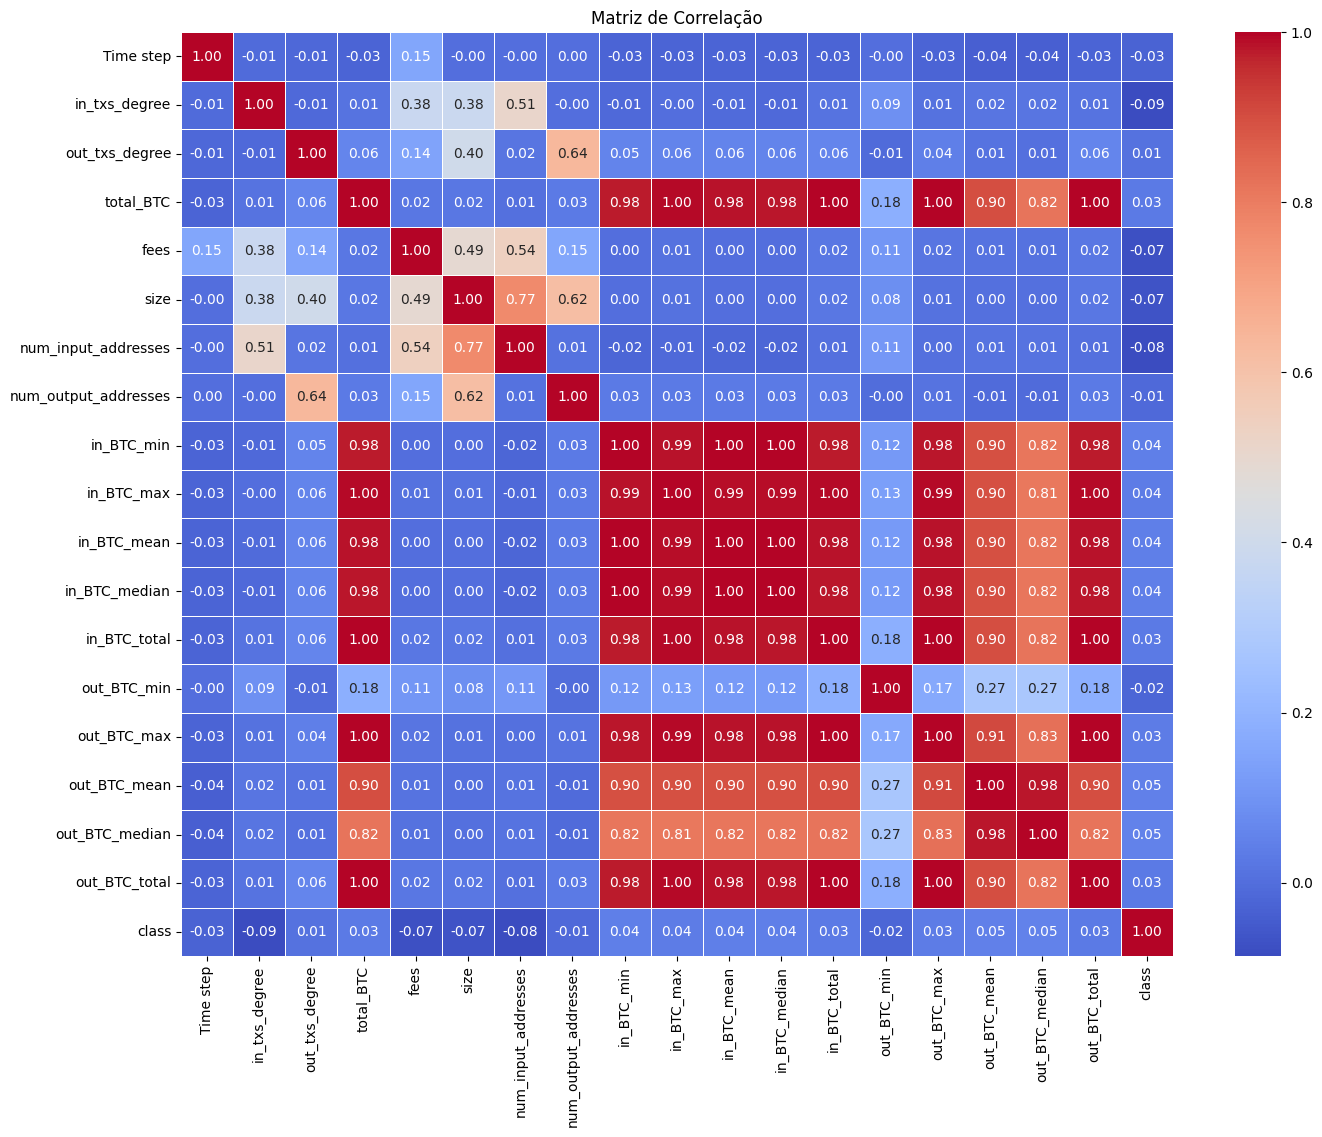

In [ ]:
# Construção da matriz de correlação
correlation_matrix = df_3.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Separação dos dados em treinamento e teste (70/30)
df_3 = df_3.dropna()
x = df_3.drop(columns=['class'])
y = df_3['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Criação do modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treino do modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)

In [ ]:
# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.845961671213964


In [ ]:
# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Relatório de classificação:
              precision    recall  f1-score   support

           1       0.55      0.58      0.57      1289
           2       0.66      0.68      0.67     12381
           3       0.91      0.90      0.90     47172

    accuracy                           0.85     60842
   macro avg       0.71      0.72      0.71     60842
weighted avg       0.85      0.85      0.85     60842



In [ ]:
# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusão:
[[  752    70   467]
 [   92  8384  3905]
 [  513  4325 42334]]


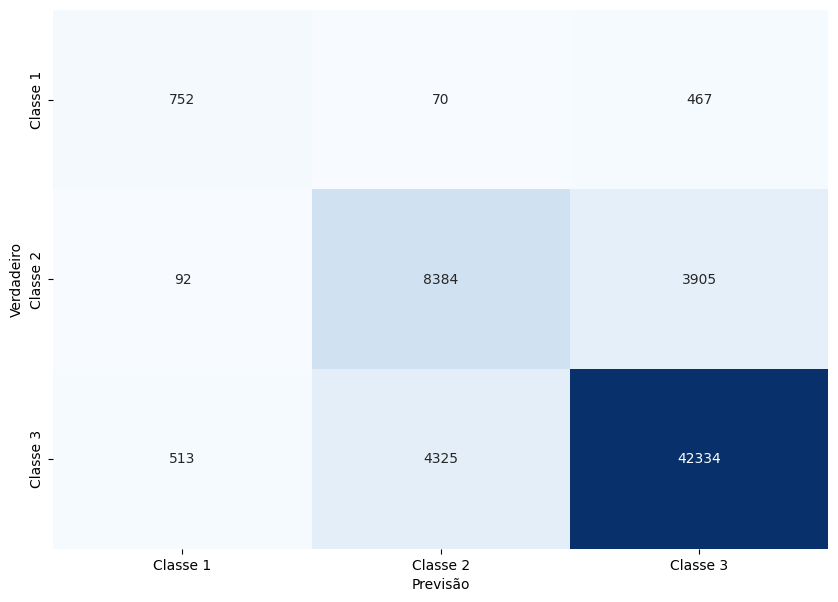

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Suponha que você tenha os valores verdadeiros e previstos
y_true = y_test  # Valores verdadeiros
y_pred = model.predict(x_test)  # Previsões do modelo

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Configurar o tamanho da figura
plt.figure(figsize=(10, 7))

# Criar o heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 1', 'Classe 2', 'Classe 3'],
            yticklabels=['Classe 1', 'Classe 2', 'Classe 3'])

# Títulos e rótulos
#plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')

# Mostrar o gráfico
plt.show()


In [ ]:
# Importância das características
importances = model.feature_importances_

# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({
    'Atributo': x.columns,
    'Importância': importances
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

# Visualizar as importâncias
print("Importância das características:")
print(feature_importance_df)

Importância das características:
                Atributo  Importância
4                   fees     0.192302
0              Time step     0.119237
13           out_BTC_min     0.117844
5                   size     0.091084
6    num_input_addresses     0.087718
14           out_BTC_max     0.057614
8             in_BTC_min     0.051459
9             in_BTC_max     0.041465
16        out_BTC_median     0.036420
11         in_BTC_median     0.032837
10           in_BTC_mean     0.029142
15          out_BTC_mean     0.027100
12          in_BTC_total     0.020779
1          in_txs_degree     0.020601
7   num_output_addresses     0.019273
2         out_txs_degree     0.018537
17         out_BTC_total     0.018385
3              total_BTC     0.018203


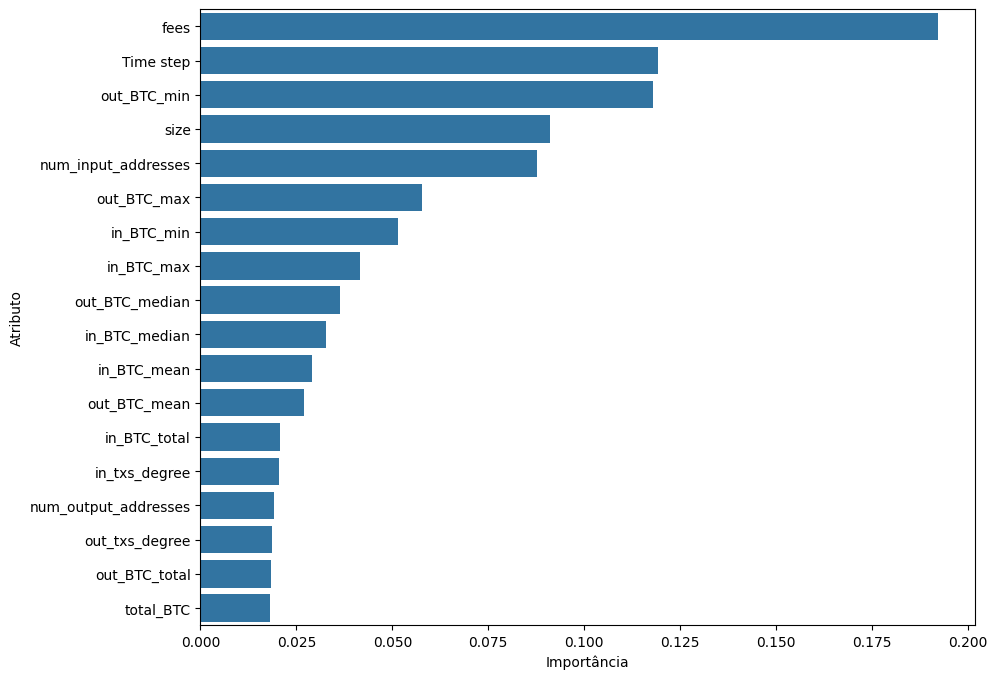

In [ ]:
# Visualizar em um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Atributo', data=feature_importance_df)
#plt.title('Importância das Características')
plt.show()

## Teste

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Seleção de uma transação específica (por exemplo, a primeira transação)
single_case = df_3.iloc[189:190]  # Seleciona a primeira linha como exemplo
print(single_case)

     Time step  in_txs_degree  out_txs_degree  total_BTC      fees    size  \
189          1            0.0             1.0   3.449908  0.000215  1257.0   

     num_input_addresses  num_output_addresses  in_BTC_min  in_BTC_max  \
189                  8.0                   2.0    0.148997    1.350393   

     in_BTC_mean  in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  \
189     0.431265       0.300812      3.450123     0.010008       3.4399   

     out_BTC_mean  out_BTC_median  out_BTC_total  class  
189      1.724954        1.724954       3.449908      1  


In [ ]:
# Separação do restante do dataset para treinamento
remaining_cases = df_3.iloc[1:]

# Separação de features e labels para o restante do dataset
x_train = remaining_cases.drop(columns=['class'])
y_train = remaining_cases['class']

# Separação das features do caso único
x_single_case = single_case.drop(columns=['class'])
y_single_case = single_case['class']

In [ ]:
# Fazer a previsão da classe para o caso específico
y_pred_single_case = model.predict(x_single_case)
print(f"Classe prevista para a transação selecionada: {y_pred_single_case[0]}")
print(f"Classe real: {y_single_case.values[0]}")

Classe prevista para a transação selecionada: 1
Classe real: 1


In [ ]:
from sklearn.tree import export_text

# Visualização da árvore de decisão
tree_rules = export_text(model, feature_names=list(x_train.columns))
print(tree_rules)

|--- num_input_addresses <= 1.50
|   |--- size <= 193.50
|   |   |--- fees <= 0.00
|   |   |   |--- in_BTC_mean <= 0.02
|   |   |   |   |--- fees <= 0.00
|   |   |   |   |   |--- fees <= 0.00
|   |   |   |   |   |   |--- fees <= 0.00
|   |   |   |   |   |   |   |--- in_BTC_min <= 0.02
|   |   |   |   |   |   |   |   |--- Time step <= 8.50
|   |   |   |   |   |   |   |   |   |--- size <= 191.50
|   |   |   |   |   |   |   |   |   |   |--- fees <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |   |--- fees >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- size >  191.50
|   |   |   |   |   |   |   |   |   |   |--- out_txs_degree <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- out_txs_degree >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- Time st

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt